![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# Callysto's Weekly Data Visualization 

## Costliest Natural Disasters

### Recommended Grade levels: 5-9

### Instructions

#### "Run" the cells to see the graphs

Click "Cell" and select "Run All".

This will import the data and run all the code, so you can see this week's data visualization. Scroll to the top after you’ve run the cells.

![instructions](https://github.com/callysto/data-viz-of-the-week/blob/main/images/instructions.png?raw=true)

**You don't need to do any coding to view the visualizations**.

The plots generated in this notebook are interactive. You can hover over and click on elements to see more information. 

Email contact@callysto.ca if you experience issues.

### About this Notebook

Callysto's Weekly Data Visualization is a learning resource that aims to develop data literacy skills. We provide Grades 5-12 teachers and students with a data visualization, like a graph, to interpret. This companion resource walks learners through how the data visualization is created and interpreted by a data scientist. 

The steps of the data analysis process are listed below and applied to each weekly topic.

1. Question - What are we trying to answer?
2. Gather - Find the data source(s) you will need. 
3. Organize - Arrange the data, so that you can easily explore it. 
4. Explore - Examine the data to look for evidence to answer the question. This includes creating visualizations. 
5. Interpret - Describe what's happening in the data visualization. 
6. Communicate - Explain how the evidence answers the question. 

## Question

What were the most expensive natural disasters in Canada? 

### Goal

Our goal is to show which natural disasters led to the greatest financial costs and use visualizations to discover any patterns to their impact.

The dataset is taken from [Public Safety Canada](https://www.publicsafety.gc.ca/cnt/rsrcs/cndn-dsstr-dtbs/index-en.aspx), and contains information on Canadian natural disaster events from the years 1900 to 2019.

### Background

Weather events and natural diasters have the potential to cause huge amounts of damage to property. Have you ever wondered what the most expensive natural disasters and weather events are in Canada? We are going to explore the costliest natural disasters in the 2010 decade in this notebook. 


# Gather

### Code: 

The next step is to setup the notebook. To setup this notebook run the code cells below to import the libraries we need for this project. In short, libraries are pre-made code that make it easier to analyze our data.

In [3]:
import pandas as pd
import plotly.express as px

Pandas is a library that helps us with data analysis, and Plotly Express is a library that helps us to make visualizations. Without importing these libraries we would have to use much more code to analyze our data and generate visualizations. We import the libraries with abbreviations, or aliases, so that we have less typing to do in each line of our code below. 

### Data
We are using data from [Public Safety Canada](https://www.publicsafety.gc.ca/cnt/rsrcs/cndn-dsstr-dtbs/index-en.aspx) on natural disasters. Run the code below to populate the data into a dataframe.

#### Import the Data

In [4]:
data = pd.read_csv('data/CDD.txt', sep='\t')
data

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE,Unnamed: 22
0,Disaster,Natural,Meteorological - Hydrological,Flood,Eastern Canada,4/18/2019 12:00:00 AM,Extensive flooding in April and May was experi...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The most severe flooding took place in Quebec ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,States of emergency extended across the 3 prov...,1,NaN,10000,0.0000,NaN,4/18/2019 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disaster,Natural,Meteorological - Hydrological,Flood,"Kashechewan, Ontario",4/15/2019 12:00:00 AM,Seasonal flooding along the Albany River force...,NaN,NaN,2500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Eastern Canada,3/14/2019 12:00:00 AM,A significant low pressure system tracked thro...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124000000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,Disaster,Natural,Meteorological - Hydrological,Wildfire,"Hopewell Cape, New Brunswick",6/5/1903 12:00:00 AM,"In June of 1903, a wildfire burned the communi...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
863,Disaster,Natural,Meteorological - Hydrological,Avalanche,"Mollie Gibson Mine, Kokanee Lake, British Colu...",12/25/1902 12:00:00 AM,"On Christmas night, an avalanche destroyed mos...",9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
864,Disaster,Natural,Meteorological - Hydrological,Flood,"Old Man River, Alberta",7/9/1902 12:00:00 AM,1902 was one of the wettest years on record in...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
865,Disaster,Natural,Meteorological - Hydrological,Flood,Saint John River Basin NB,3/1/1902 12:00:00 AM,"Saint John River Basin NB, March 1902. An unus...",2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


### Comment on the data

The dataframe above is where the data is housed in this project. A data frame is structure that Python uses to display data; a data frame looks like a spreadsheet. We can look at the 

As we can see from the numbers below the dataframe itself, this dataset has 867 rows and 23 columns. Each row represents a disaster, and each column describes an aspect of that disaster. 

We can look at a specific column in the data by using the code below. We are going to examine the data in the 50th column. 

In [13]:
display(data.iloc[50])

EVENT CATEGORY                                                             Disaster
EVENT GROUP                                                                 Natural
EVENT SUBGROUP                                        Meteorological - Hydrological
EVENT TYPE                                                                    Flood
PLACE                                                              Fort McMurray AB
EVENT START DATE                                              7/30/2016 12:00:00 AM
COMMENTS                          Fort McMurray AB, July 30-31 2016. Only weeks ...
FATALITIES                                                                      NaN
INJURED / INFECTED                                                              NaN
EVACUATED                                                                       NaN
ESTIMATED TOTAL COST                                                    462528000.0
NORMALIZED TOTAL COST                                                    216

We can see that this particular event in row 50 was a flood that occured in Fort McMurray on 2016. By looking at the comments column we can see that there are particular dates that the flood affad a ected the community. It is also evidence from looking at the data that this event had an estimated total cost and a normalized total cost. 

Look at the columns in the following list to see what values are available in this data set. Which ones are interesting to you? To answer our question a few columns are going to be most useful in analyzing the data 

In the next step, we'll dive into more detail and exactly what the data contains. 

In [3]:
for i in data.columns:
    print(i)

EVENT CATEGORY
EVENT GROUP
EVENT SUBGROUP
EVENT TYPE
PLACE
EVENT START DATE
COMMENTS
FATALITIES
INJURED / INFECTED
EVACUATED
ESTIMATED TOTAL COST
NORMALIZED TOTAL COST
EVENT END DATE
FEDERAL DFAA PAYMENTS
PROVINCIAL DFAA PAYMENTS
PROVINCIAL DEPARTMENT PAYMENTS
MUNICIPAL COSTS
OGD COSTS
INSURANCE PAYMENTS
NGO PAYMENTS
UTILITY - PEOPLE AFFECTED
MAGNITUDE
Unnamed: 22


The `COMMENTS` field may be of particular interest; when we read that column we can get more specific infomation on some of the events. Under `EVENT TYPE`, we can see some categories that the disasters might belong to. We can focus on these aspects of the data, and more, in the next steps. The columns that are going to be useful to answer our question here are the columns that have information about costs. Because we are going to be trying to answer a question about costs we need to ensure we loook at data that references cost. The column `NORMALIZED TOTAL COST` takes into account inflation. 

The Canadian Disasters Database, where this data is taken from, defines a disaster with the following definition:

>A disaster is an interruption in time and space of normal processes causing death,
injury or homelessness, economic or property loss, and/or significant environmental
damage. The interruption is beyond the coping capacity of the community and/or is
beyond the assumed risk factors of human activity. Assumed risk is inherent in most
human activity such as transportation and handling of dangerous goods. The
interruption precludes war.


The Canadian disaster database provides the follow definitions for some of their fields.

**EVACUATED**
If the exact or estimated number of people evacuated from the area during a disaster is known, it
is placed in this field. Otherwise, the field contains a zero.

**DOLDAM**
If the exact or estimated value of the damage in millions of dollars is known, it is placed in this
field. Otherwise, the field contains a zero. Note that the values shown are estimates given in the
dollar value at the time of the disaster, and inflation is not taken into account.

**INJURED**
If the exact or estimated number of injuries is known, it is placed in this field. Otherwise, the field
contains a zero.

**COMENG / COMFRA**
These two fields allow for comments in English and French, respectively. Where possible, they
include a brief outline of the disaster and a qualitative description of the resulting damage.

**PLACE NAME / LAT / LONG**
A location of the disaster is included to assign latitude and longitudinal coordinates to the
disaster. For some records, this indicates a central or approximate location, as the disasters may
cover large regions.






"This should be the longest text section of the entire notebook" (Swanson, 2023)

# Organize

An important part of the data science process is cleaning up and organizing your data so it can be useful for finding observations. Part of cleaning involves 
- identifying missing data
removing missing data, ensuring the data is all in the same format, as well as identifying and dealing with outliers. 

Many of our fields have data in them, in data science we call that non-null. If you were to forget to write your name on your paper the name field would be null because there is no data in it. Once you write your name on your work suddenlty that value is non-null, because the value has data in it. Look at the information below when we run the `data.info` code  which fields have a higher number of non-null cells, as that number varies quite a bit by column. A few of the fields have very few non-null cells, meaning most of the data is not available. 


 In Python, missing data is identified as `NaN` ('Not a Number'), so we want to see how much of our dataframe contains missing data. We do this by asking for the fields where the data is 'non-null'. Non-null essentially means those fields have actual data in them, or that they are *not* missing values.

Let's look at what the column names are and how many non-null data each contain. This function returns all of the column names, along with the number of non-null values inside each column. The number of non-null values is available by looking at the `Non-Null Count` column. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EVENT CATEGORY                  867 non-null    object 
 1   EVENT GROUP                     853 non-null    object 
 2   EVENT SUBGROUP                  850 non-null    object 
 3   EVENT TYPE                      853 non-null    object 
 4   PLACE                           859 non-null    object 
 5   EVENT START DATE                848 non-null    object 
 6   COMMENTS                        859 non-null    object 
 7   FATALITIES                      746 non-null    float64
 8   INJURED / INFECTED              702 non-null    float64
 9   EVACUATED                       726 non-null    float64
 10  ESTIMATED TOTAL COST            497 non-null    float64
 11  NORMALIZED TOTAL COST           483 non-null    float64
 12  EVENT END DATE                  833 


As the financial cost is the main question we're trying to answer, we are using the `NORMALIZED TOTAL COST` for our analysis and visualization. The `NORMALIZED TOTAL COST` differs from the `ESTIMATED TOTAL COST` by taking into account inflation. As the data spans from the years 1900 to 2019, the real value of money has steadily decreased, so we need to account for that. The year 2016 is the last year we're able to normalize for from the data, and because this is the column we are most curious about, we want to omit any rows that don't include an amount for that column:

In [5]:
data = data[data['NORMALIZED TOTAL COST'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 42 to 852
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EVENT CATEGORY                  483 non-null    object 
 1   EVENT GROUP                     483 non-null    object 
 2   EVENT SUBGROUP                  483 non-null    object 
 3   EVENT TYPE                      483 non-null    object 
 4   PLACE                           483 non-null    object 
 5   EVENT START DATE                483 non-null    object 
 6   COMMENTS                        483 non-null    object 
 7   FATALITIES                      423 non-null    float64
 8   INJURED / INFECTED              403 non-null    float64
 9   EVACUATED                       438 non-null    float64
 10  ESTIMATED TOTAL COST            483 non-null    float64
 11  NORMALIZED TOTAL COST           483 non-null    float64
 12  EVENT END DATE                  483

There is a lower total number of rows because we have removed all of the rows that do not have data for our column of interest. If there is no data in our column of interest it is because data does not exist for that value. 

We're also interested in the types of events that are included in the data. We can look at the `EVENT SUBGROUP` to see what types of events exist, and the code below extracts the unique values in that column: 

In [6]:
list(data['EVENT SUBGROUP'].unique())

['Meteorological - Hydrological']

It makes sense that events would be 'Meteorological - Hydrological', but what does '25' mean? Let's check out rows that have that value for `EVENT SUBGROUP`:

In [7]:
data[data['EVENT SUBGROUP']!='Meteorological - Hydrological']

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE,Unnamed: 22


# \# add text about what you found above and what to do with it

Now we can get rid of any data values where the `EVENT SUBGROUP` is not 'Meteorological - Hydrological'. This process removes the one outlier of our data that does not fit this category and makes our data cleaner to work with. 

In [8]:
data = data[data['EVENT SUBGROUP']=='Meteorological - Hydrological']
data

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE,Unnamed: 22
42,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,Christmas Island NS,12/25/2016 12:00:00 AM,"Christmas Island NS, December 25, 2016. Reside...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10038.0,NaN,NaN
43,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Nova Scotia and Prince Edward Island,11/27/2016 12:00:00 AM,"Nova Scotia and Prince Edward Island, November...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69000.0,NaN,NaN
44,Disaster,Natural,Meteorological - Hydrological,Flood,Red Earth First Nation SK,11/14/2016 12:00:00 AM,"Red Earth First Nation SK, July 14-18, 2016. H...",NaN,NaN,576.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,South Coast and Lower Mainland British Columbia,10/12/2016 12:00:00 AM,South Coast and Lower Mainland British Columbi...,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225000.0,NaN,NaN
46,Disaster,Natural,Meteorological - Hydrological,Flood,"Nova Scotia, Prince Edward Island and Newfound...",10/9/2016 12:00:00 AM,"Nova Scotia, Prince Edward Island and Newfound...",NaN,NaN,NaN,...,30350000.0,NaN,NaN,NaN,NaN,NaN,NaN,390600.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Disaster,Natural,Meteorological - Hydrological,Drought,Prairie Provinces,1/1/1919 12:00:00 AM,"Prairie Provinces, 1919. Cereal crop drought o...",0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
836,Disaster,Natural,Meteorological - Hydrological,Drought,Prairie Provinces,1/1/1918 12:00:00 AM,"Prairie Provinces, 1918. Cereal crop drought o...",0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
838,Disaster,Natural,Meteorological - Hydrological,Drought,Prairie Provinces,1/1/1917 12:00:00 AM,"Prairie Provinces, 1917. Cereal crop drought o...",0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
846,Disaster,Natural,Meteorological - Hydrological,Drought,Prairie Provinces,1/1/1914 12:00:00 AM,"Prairie Provinces, 1914. Cereal crop drought o...",0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [9]:
data = data[data['EVENT SUBGROUP']=='Meteorological - Hydrological']
data

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE,Unnamed: 22
42,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,Christmas Island NS,12/25/2016 12:00:00 AM,"Christmas Island NS, December 25, 2016. Reside...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10038.0,NaN,NaN
43,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Nova Scotia and Prince Edward Island,11/27/2016 12:00:00 AM,"Nova Scotia and Prince Edward Island, November...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69000.0,NaN,NaN
44,Disaster,Natural,Meteorological - Hydrological,Flood,Red Earth First Nation SK,11/14/2016 12:00:00 AM,"Red Earth First Nation SK, July 14-18, 2016. H...",NaN,NaN,576.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,South Coast and Lower Mainland British Columbia,10/12/2016 12:00:00 AM,South Coast and Lower Mainland British Columbi...,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225000.0,NaN,NaN
46,Disaster,Natural,Meteorological - Hydrological,Flood,"Nova Scotia, Prince Edward Island and Newfound...",10/9/2016 12:00:00 AM,"Nova Scotia, Prince Edward Island and Newfound...",NaN,NaN,NaN,...,30350000.0,NaN,NaN,NaN,NaN,NaN,NaN,390600.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Disaster,Natural,Meteorological - Hydrological,Drought,Prairie Provinces,1/1/1919 12:00:00 AM,"Prairie Provinces, 1919. Cereal crop drought o...",0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
836,Disaster,Natural,Meteorological - Hydrological,Drought,Prairie Provinces,1/1/1918 12:00:00 AM,"Prairie Provinces, 1918. Cereal crop drought o...",0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
838,Disaster,Natural,Meteorological - Hydrological,Drought,Prairie Provinces,1/1/1917 12:00:00 AM,"Prairie Provinces, 1917. Cereal crop drought o...",0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
846,Disaster,Natural,Meteorological - Hydrological,Drought,Prairie Provinces,1/1/1914 12:00:00 AM,"Prairie Provinces, 1914. Cereal crop drought o...",0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


You can now see our data frame only includes events where the `EVENT SUBGROUP` is equal to 'Meteorological - Hydrological'. Look under `EVENT TYPE` to see more information about what each of these events were. 
 
# \# keep in mind the readers probably don't know how to look into the dataframe to find more information. Instead, add a section where you do that.

# Explore

The next part of the data science process is generating a visualization to help us answer our question. This part of the data science process is really exciting! A visualization is often a graph, but it can be any way that we can visually show our data. In our case, we are going to use a scatter plot. A visualization helps to understand what kind of story our data is telling us. 

Run the code below to generate a scatter plot from the data that will help us to answer our question. Each point represents a specific event.

The size of the points represents the estimated cost, and the color represents the total insurance payments paid out for that particular event.

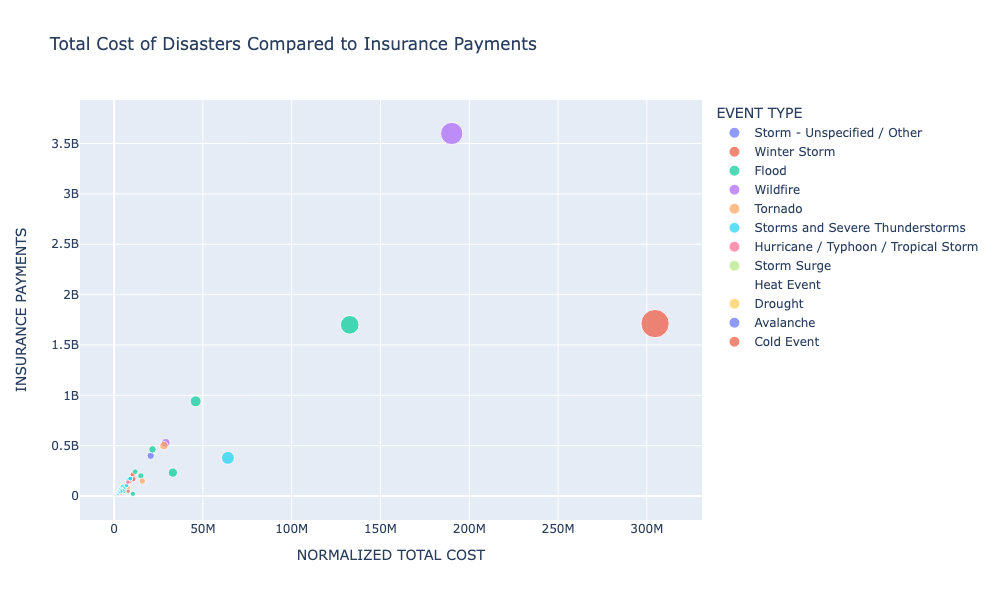

In [13]:
fig = px.scatter(data, x="NORMALIZED TOTAL COST", y="INSURANCE PAYMENTS", 
                 title='Total Cost of Disasters Compared to Insurance Payments', 
                 hover_data={"PLACE","COMMENTS"},
                 size='NORMALIZED TOTAL COST',
                 color='EVENT TYPE',
                 height=600)

fig.show()

# Interpret

In the scatter plot you can see the total cost of disaster events on the x axis and the amount of insurance payments for those disaster events being on the y axis. The color of the dots represents the different types of disaster events; for example tornados are a different color than winter storms. You can click on the dots that represent specific types of events in the legend to the right and hide particular event categories if you want to change the type of events you are looking at on the visualization. The larger dots also show events that had a larger normalized total cost. The normalized total cost on the x axis is shown in millions of dollars while the insurance payments on the y axis are shown in billions of dollars. 

If you scroll your cursor over a particular dot there are more details about the event represented by that dot. 

The majority of the events are relatively low in cost as they seem to be under half a billion dollrs in insurance payments and the normalized total cost of most of the events was under fifty million dollars. Which events are outside of that range? There are three events in particular that have a much higher cost when compared to the rest of the events. What can you find out from the scatter plot about those particular events? These events all were covered fairly extensively in the news. As an extension to this notebook you could work to do some more research on these events. 

# Reflect on what you see

After making your visualization the next step is to use the data and your visualization to answer the question. Look at and interact with the visualization above. When you hover your mouse over the plots, you’ll notice more information appears. You can also use the legend to make plots appear and disappear.

#### Think about the following questions.

* What do you notice about these graphs?
* What do you wonder about the data?
* What kind of inferences can you make based on this data?
* Is there another way to visualize this data that would change your inerpretation of the information? 


#### Use the fill-in-the-blank prompts to summarize your thoughts.
* "I used to think _______"
* "Now I think _______"
* "I wish I knew more about _______"
* "These data visualizations remind me of _______"
* "I really like _______"

# Communicate

If you have not yet done this use the plot to answer our question on which natural disaster was the most expensive. 
Once we understand the costs of natural disasters how can we use that information?

How can you communicate that information? What kind of product could you create to share that information with your school community and wider community?

Consider tagging Callysto on [Twitter](https://twitter.com/callysto_canada), [YouTube](https://www.youtube.com/Callysto), [TikTok](https://www.tiktok.com/@callysto_canada), [Facebook](https://www.facebook.com/callystocanada/), or [Linkedin](https://www.linkedin.com/company/callysto-canada/) if you decide to share your reflections or projects on social media.

# Further Resources

For more information on the costliest weather events between 2012 and 2016 check out this article from the [Weather Network](https://www.theweathernetwork.com/ca/news/article/the-top-five-costliest-canadian-natural-disasters-of-the-2010s) 

You may find the following video about the 2013 Calgary floods interesting. Ensure you run the cell below to display the Youtube video. 

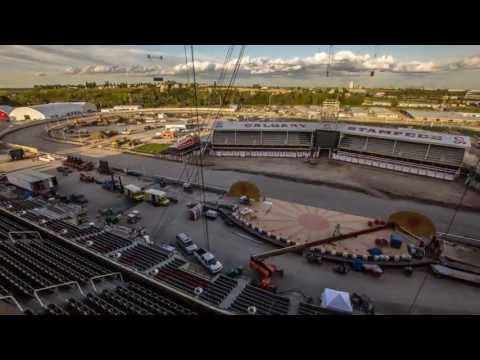

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('jgw06p4jeh8')

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)